# Swing states

V případě amerických prezidentských voleb obecně platí, že ve většině států dlouhodobě vyhrávají kandidáti jedné strany. Například v Kalifornii vyhrává kandidát Demokratické strany or roku 1992, v Texasu kandidát Republikánské strany od roku 1980, v Kansasu do konce od roku 1968 atd. Státy, kde se vítězné strany střídají, jsou označovány jako "swing states" ("kolísavé státy"). Tvým úkolem je vybrat státy, které lze označit jako swing states.

V souboru [1976-2020-president.csv](1976-2020-president.csv) najdeš historické výsledky amerických prezidentských voleb. Každý řádek souboru obsahuje počet hlasů pro kandidáta dané strany v daném roce.

V souboru jsou důležité následující sloupce:

- `year` - rok voleb,
- `state` - stát,
- `party_simplified` - zjednodušené označení politické strany,
- `candidatevotes` - počet hlasů pro vybraného kandidáta,
- `totalvotes` - celkový počet odevzdaných hlasů.



In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.options.mode.chained_assignment = None

df = pd.read_csv("1976-2020-president.csv")
df = df.drop(
    columns=[
        "state_po",
        "state_fips",
        "state_cen",
        "state_ic",
        "office",
        "writein",
        "version",
        "notes",
        "party_detailed",
    ]
)
df.head()

,year,state,candidate,candidatevotes,totalvotes,party_simplified
0,1976,ALABAMA,"CARTER, JIMMY",659170,1182850,DEMOCRAT
1,1976,ALABAMA,"FORD, GERALD",504070,1182850,REPUBLICAN
2,1976,ALABAMA,"MADDOX, LESTER",9198,1182850,OTHER
3,1976,ALABAMA,"BUBAR, BENJAMIN """"BEN""""",6669,1182850,OTHER
4,1976,ALABAMA,"HALL, GUS",1954,1182850,OTHER


Proveď níže uvedené úkoly.



1. Urči pořadí jednotlivých kandidátů v jednotlivých státech a v jednotlivých letech (pomocí metody `rank()`). Nezapomeň, že data je před použitím metody nutné seřadit a spolu s metodou `rank()` je nutné použít metodu `groupby()`.


In [144]:
df_sorted = df.sort_values(
    ["state", "year", "candidatevotes"], ascending=[True, True, False]
)
df_sorted["rank"] = df_sorted.groupby(["state", "year"])["candidatevotes"].rank(
    ascending=False
)

df_sorted.head()  # .tail()

,year,state,candidate,candidatevotes,totalvotes,party_simplified,rank
0,1976,ALABAMA,"CARTER, JIMMY",659170,1182850,DEMOCRAT,1.0
1,1976,ALABAMA,"FORD, GERALD",504070,1182850,REPUBLICAN,2.0
2,1976,ALABAMA,"MADDOX, LESTER",9198,1182850,OTHER,3.0
3,1976,ALABAMA,"BUBAR, BENJAMIN """"BEN""""",6669,1182850,OTHER,4.0
4,1976,ALABAMA,"HALL, GUS",1954,1182850,OTHER,5.0


2. Pro další analýzu jsou důležití pouze vítězové. Vytvoř novou tabulku, která bude obsahovat pouze vítěze voleb.


In [145]:
winners = df_sorted[df_sorted["rank"] == 1]
winners.head()

,year,state,candidate,candidatevotes,totalvotes,party_simplified,rank
0,1976,ALABAMA,"CARTER, JIMMY",659170,1182850,DEMOCRAT,1.0
332,1980,ALABAMA,"REAGAN, RONALD",654192,1341929,REPUBLICAN,1.0
696,1984,ALABAMA,"REAGAN, RONALD",872849,1441713,REPUBLICAN,1.0
1019,1988,ALABAMA,"BUSH, GEORGE H.W.",815576,1378476,REPUBLICAN,1.0
1304,1992,ALABAMA,"BUSH, GEORGE H.W.",804283,1688060,REPUBLICAN,1.0


3. Pomocí metody `shift()` přidej nový sloupec, abys v jednotlivých řádcích měl(a) po sobě vítězné strany ve dvou po sobě jdoucích letech.


In [146]:
winners["winner_4yrs_ago"] = winners.groupby("state")["party_simplified"].shift(1)
winners.head()

,year,state,candidate,candidatevotes,totalvotes,party_simplified,rank,winner_4yrs_ago
0,1976,ALABAMA,"CARTER, JIMMY",659170,1182850,DEMOCRAT,1.0,NaN
332,1980,ALABAMA,"REAGAN, RONALD",654192,1341929,REPUBLICAN,1.0,DEMOCRAT
696,1984,ALABAMA,"REAGAN, RONALD",872849,1441713,REPUBLICAN,1.0,REPUBLICAN
1019,1988,ALABAMA,"BUSH, GEORGE H.W.",815576,1378476,REPUBLICAN,1.0,REPUBLICAN
1304,1992,ALABAMA,"BUSH, GEORGE H.W.",804283,1688060,REPUBLICAN,1.0,REPUBLICAN


4. Porovnej, jestli se ve dvou po sobě jdoucích letech změnila vítězná strana. Můžeš k tomu použít např. funkci `numpy.where()` nebo metodu `apply()`.


In [147]:
winners["change"] = np.where(
    (winners["party_simplified"] == winners["winner_4yrs_ago"])
    | (winners["winner_4yrs_ago"].isnull()),
    0,
    1,
)
# winners['change'] = winners.apply(lambda row: 'No change' if row['party_simplified'] == row['winner_4yrs_ago'] else 'Change', axis=1)

winners.head()

,year,state,candidate,candidatevotes,totalvotes,party_simplified,rank,winner_4yrs_ago,change
0,1976,ALABAMA,"CARTER, JIMMY",659170,1182850,DEMOCRAT,1.0,NaN,0
332,1980,ALABAMA,"REAGAN, RONALD",654192,1341929,REPUBLICAN,1.0,DEMOCRAT,1
696,1984,ALABAMA,"REAGAN, RONALD",872849,1441713,REPUBLICAN,1.0,REPUBLICAN,0
1019,1988,ALABAMA,"BUSH, GEORGE H.W.",815576,1378476,REPUBLICAN,1.0,REPUBLICAN,0
1304,1992,ALABAMA,"BUSH, GEORGE H.W.",804283,1688060,REPUBLICAN,1.0,REPUBLICAN,0


5. Proveď agregaci podle názvu státu a seřaď státy podle počtu změn vítězných stran.


In [148]:
state_counts = winners.groupby(["state"])["change"].sum().to_frame()
state_counts = state_counts.sort_values("change", ascending=False)
state_counts

,change
state,
OHIO,5
FLORIDA,5
GEORGIA,4
WISCONSIN,4
IOWA,4
PENNSYLVANIA,4
NEVADA,3
TENNESSEE,3
LOUISIANA,3


6. Vytvoř sloupcový graf s 10 státy, kde došlo k nejčastější změně vítězné strany. Jako výšku sloupce nastav počet změn.


<Axes: xlabel='state'>

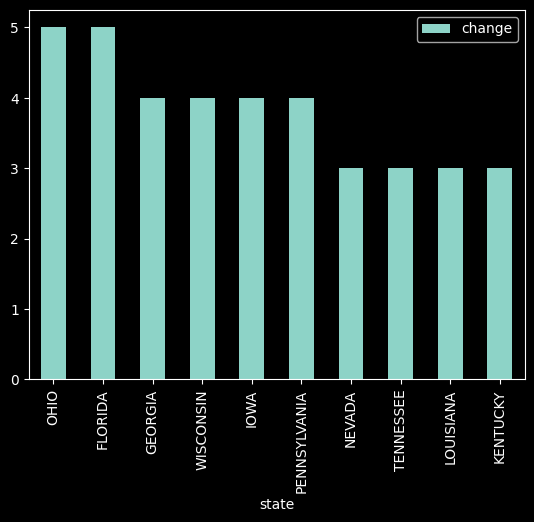

In [149]:
state_counts = state_counts.iloc[:10]
state_counts.plot(kind="bar")

---


Pro další část pracuj s tabulkou se dvěma nejúspěšnějšími kandidáty pro každý rok a stát (tj. s tabulkou, která oproti té minulé neobsahuje jen vítěze, ale i druhého v pořadí).


In [151]:
df_sorted_top_2 = df_sorted[df_sorted["rank"].isin([1, 2])].reset_index(drop=True)
df_sorted_top_2.head()

,year,state,candidate,candidatevotes,totalvotes,party_simplified,rank
0,1976,ALABAMA,"CARTER, JIMMY",659170,1182850,DEMOCRAT,1.0
1,1976,ALABAMA,"FORD, GERALD",504070,1182850,REPUBLICAN,2.0
2,1980,ALABAMA,"REAGAN, RONALD",654192,1341929,REPUBLICAN,1.0
3,1980,ALABAMA,"CARTER, JIMMY",636730,1341929,DEMOCRAT,2.0
4,1984,ALABAMA,"REAGAN, RONALD",872849,1441713,REPUBLICAN,1.0



1. Přidej do tabulky sloupec, který obsahuje absolutní rozdíl mezi vítězem a druhým v pořadí.


In [152]:
# Calculate the absolute difference between first and second place
df_sorted_top_2["abs_diff"] = abs(
    df_sorted_top_2["candidatevotes"]
    - df_sorted_top_2.groupby(["year", "state"])["candidatevotes"].shift(1)
)

df_sorted_top_2 = df_sorted_top_2.dropna(axis=0)

df_sorted_top_2.head()

,year,state,candidate,candidatevotes,totalvotes,party_simplified,rank,abs_diff
1,1976,ALABAMA,"FORD, GERALD",504070,1182850,REPUBLICAN,2.0,155100.0
3,1980,ALABAMA,"CARTER, JIMMY",636730,1341929,DEMOCRAT,2.0,17462.0
5,1984,ALABAMA,"MONDALE, WALTER",551899,1441713,DEMOCRAT,2.0,320950.0
7,1988,ALABAMA,"DUKAKIS, MICHAEL",549506,1378476,DEMOCRAT,2.0,266070.0
9,1992,ALABAMA,"CLINTON, BILL",690080,1688060,DEMOCRAT,2.0,114203.0


2. Dále přidej sloupec s relativním marginem, tj. rozdílem vyděleným počtem hlasů.


In [153]:
df_sorted_top_2["rel_margin"] = (
    df_sorted_top_2["abs_diff"] / df_sorted_top_2["totalvotes"]
)

df_sorted_top_2.head()

,year,state,candidate,candidatevotes,totalvotes,party_simplified,rank,abs_diff,rel_margin
1,1976,ALABAMA,"FORD, GERALD",504070,1182850,REPUBLICAN,2.0,155100.0,0.131124
3,1980,ALABAMA,"CARTER, JIMMY",636730,1341929,DEMOCRAT,2.0,17462.0,0.013013
5,1984,ALABAMA,"MONDALE, WALTER",551899,1441713,DEMOCRAT,2.0,320950.0,0.222617
7,1988,ALABAMA,"DUKAKIS, MICHAEL",549506,1378476,DEMOCRAT,2.0,266070.0,0.193018
9,1992,ALABAMA,"CLINTON, BILL",690080,1688060,DEMOCRAT,2.0,114203.0,0.067653


3. Seřaď tabulku podle velikosti relativního marginu a zjisti, kdy a ve kterém státě byl výsledek voleb nejtěsnější.

In [154]:
closest_race = df_sorted_top_2.sort_values(by="rel_margin")
closest_race = closest_race.iloc[0]
print(
    f"Closest race was in {closest_race['state']} in {closest_race['year']} with a relative margin of {closest_race['rel_margin']} and absolute difference of {closest_race['abs_diff']} votes."
)

closest_race

Closest race was in FLORIDA in 2000 with a relative margin of 9.005368004279646e-05 and absolute difference of 537.0 votes.


year                    2000
state                FLORIDA
candidate           GORE, AL
candidatevotes       2912253
totalvotes           5963110
party_simplified    DEMOCRAT
rank                     2.0
abs_diff               537.0
rel_margin           0.00009
Name: 229, dtype: object

Vytvoř pivot tabulku, která zobrazí pro jednotlivé volební roky, kolik států přešlo od Republikánské strany k Demokratické straně, kolik států přešlo od Demokratické strany k Republikánské straně a kolik států volilo kandidáta stejné strany.

In [177]:
def change_type(row):
    if row["change"] == 1:
        return (
            "to democrat" if row["party_simplified"] == "DEMOCRAT" else "to republican"
        )
    else:
        return "no change"


winners["type_of_change"] = winners.apply(change_type, axis=1)

# Vytvoření pivot tabulky
pivot_table = pd.pivot_table(
    data=winners,
    index="year",
    columns="type_of_change",
    values="state",
    aggfunc=len,
    fill_value=0,
)

pivot_table

type_of_change,no change,to democrat,to republican
year,,,
1976,51,0,0
1980,35,0,16
1984,45,0,6
1988,42,9,0
1992,29,22,0
1996,46,2,3
2000,40,0,11
2004,48,1,2
2008,42,9,0


In [ ]:
# Something extra:
#
# https://towardsdatascience.com/analysis-of-us-elections-from-1976-to-2010-with-pandas-6654cf69849d

# https://projects.fivethirtyeight.com/2020-swing-states/

# https://usafacts.org/articles/what-are-the-current-swing-states-and-how-have-they-changed-over-time/